In [ ]:
pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.0 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [ ]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


# Q1. 연령대별 허리둘레에 대한 기술통계
다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [ ]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [ ]:
age_code = pd.Series(age_code)

In [ ]:
age_code

1       0~4세
2       5~9세
3     10~14세
4     15~19세
5     20~24세
6     25~29세
7     30~34세
8     35~39세
9     40~44세
10    45~49세
11    50~54세
12    55~59세
13    60~64세
14    65~69세
15    70~74세
16    75~79세
17    80~84세
18      85세+
dtype: object

In [ ]:
age_code_data = age_code[df['연령대코드(5세단위)']]
age_code_data

13    60~64세
8     35~39세
8     35~39세
12    55~59세
8     35~39세
       ...  
9     40~44세
9     40~44세
12    55~59세
11    50~54세
9     40~44세
Length: 1000000, dtype: object

In [ ]:
df['연령대'] = age_code_data.reset_index(drop=True) 

In [ ]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연안함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세,흡연안함,안마심
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세,흡연안함,마심
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연중,안마심


In [ ]:
pd.pivot_table(df, index='연령대', values='허리둘레', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


# Q2. 상관계수 시각화
"음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수 구하고 시각화 하기

In [ ]:
df_small = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]
df_corr = df_small.corr()

In [ ]:
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


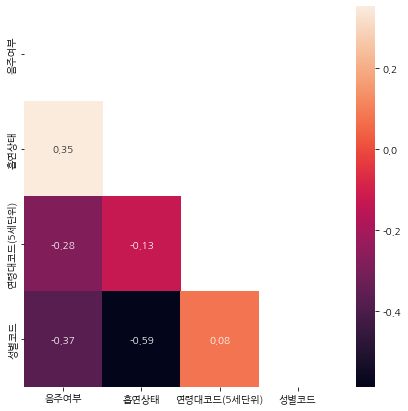

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(7, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", mask=mask)

# Q3. 흡연하는 사람과 음주하는 사람들 차

In [ ]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [ ]:
df["흡연"] =df["흡연상태"].replace(smoke)
df["음주"] = df["음주여부"].replace(drink)

In [ ]:
pd.crosstab(df["음주"], df["흡연"])

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


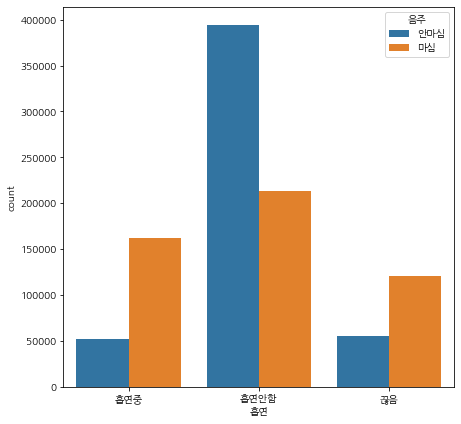

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot(x='흡연', data=df, hue='음주')

# Q4. 체중이 120Kg 이상인 데이터 시각화

"총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요

In [ ]:
df_120 = df[df['체중(5Kg 단위)']>=120]

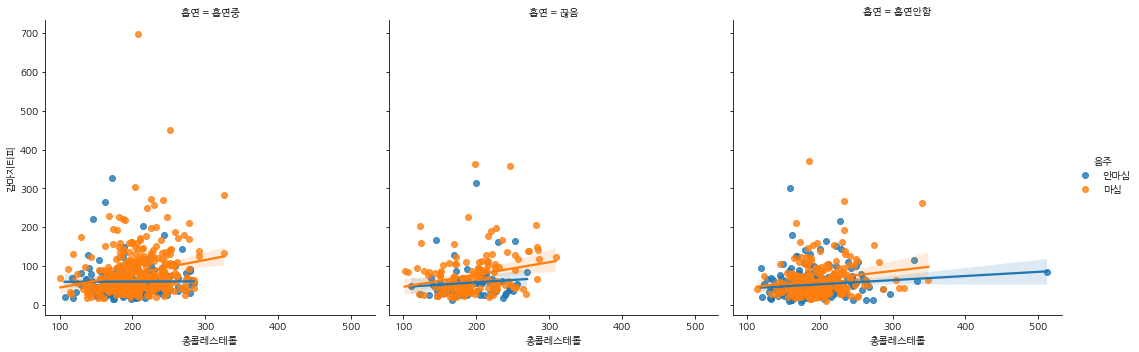

In [ ]:
sns.lmplot(data=df_120, x='총콜레스테롤', y='감마지티피', hue='음주', col='흡연')

# Q5. 연령대별 좌우 시력 시각화

In [ ]:
df_new = df[~(df['시력(좌)'] == 9.9) & ~(df['시력(우)'] == 9.9)]

In [ ]:
df_new = df_new.sort_values(by='연령대', ascending=True)

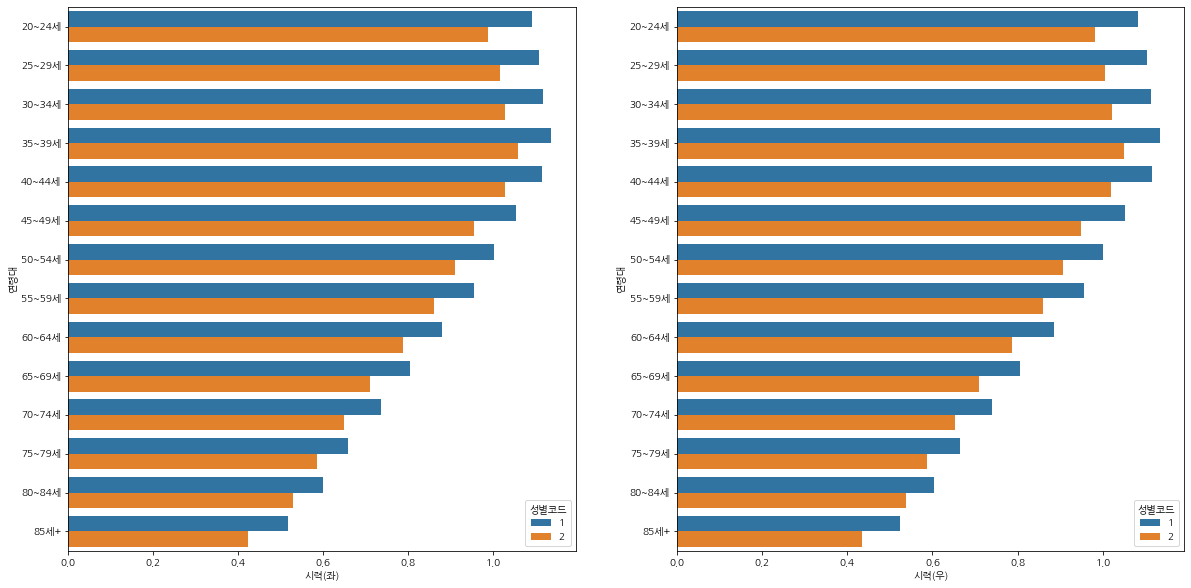

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(x='시력(좌)', y='연령대', data=df_new2, hue='성별코드', ax=ax[0], orient='h', ci=None)

sns.barplot(x='시력(우)', y='연령대', data=df_new2, hue='성별코드', ax=ax[1], orient='h', ci=None)

plt.show()